# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

**This graph is useful since it distills the three features into two, allowing us to see outliers within our dataset across all features. It is simpler than a pair plot to look at, though it is more difficult to understand the meaning of the axes. It presents a great visualization of the relationships between variables - especially accompanied by the components and their explained variance ratios. It does show that there is little relationship between series 3 and the other two (which are likely strongly correlated as their variance is explained together by component 2).**

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

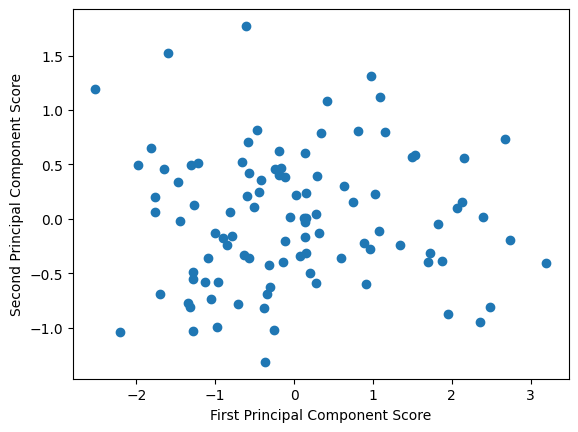

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [6]:
# Reading in the processed data from Milestone 3
injury = pd.read_csv('../Semester-2/AI4L/data/injuryrecord_post.csv')
plays = pd.read_csv('../Semester-2/AI4L/data/playlist_post.csv')

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

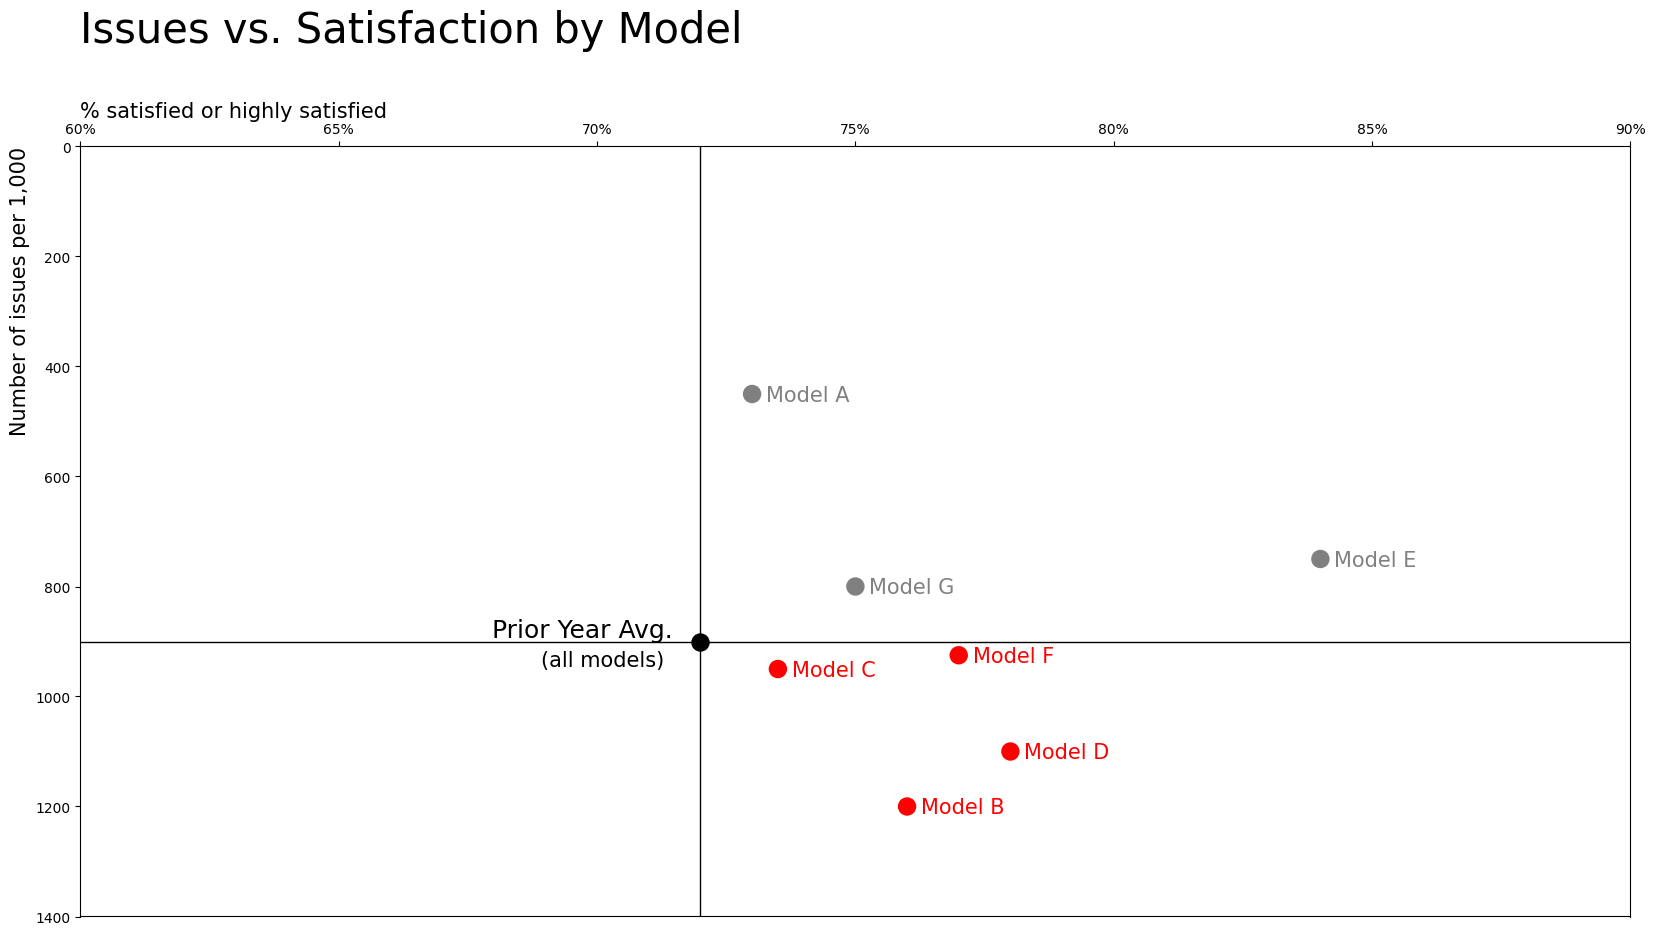

In [64]:
import matplotlib.pyplot as plt

# Create data, labels, ticks
x = np.array([.73, .76, .735, .78, .84, .77, .75])
y = np.array([450, 1200, 950, 1100, 750, 925, 800])
labels = np.array([f'Model {a}' for a in ['A', 'B', 'C', 'D', 'E', 'F', 'G']])
xticks = [.6+(x*.05) for x in range(7)]
yticks = [y*200 for y in range(8)]
xticks_labels = ['60%', '65%', '70%', '75%', '80%', '85%', '90%']
colors=['gray', 'red', 'red', 'red', 'gray', 'red', 'gray']

# Create figure
plt.figure(figsize=(20,10))
plt.scatter(x, y, c=colors, s=150)
plt.scatter([.72], [900], c=['black'], s=150)
plt.title('Issues vs. Satisfaction by Model', fontsize=30, loc='left', pad=75)

# Fix Axis and labels and ticks
plt.xlabel('% satisfied or highly satisfied', loc='left', fontsize=15)
plt.ylabel('Number of issues per 1,000', loc='top', fontsize=15)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.xticks(xticks, xticks_labels)
plt.yticks(yticks)

# Add average lines label points
for i in range(len(x)):    
    plt.annotate(labels[i],(x[i], y[i]),textcoords="offset points",xytext=(10, -5),ha='left', fontsize=15, c=colors[i])
plt.annotate('Prior Year Avg.',(.72, 900), textcoords="offset points", xytext=(-150, 3),ha='left', fontsize=18, c='black')
plt.annotate('(all models)',(.72, 900), textcoords="offset points", xytext=(-115, -18),ha='left', fontsize=15, c='black')
plt.axhline(900, color='black', linewidth=1)
plt.axvline(0.72, color='black', linewidth=1)

# Add extra text


plt.show()